### Feature Extraction with Eigen Face

![Alt text](image.png)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

## Eigen Face
from sklearn.decomposition import PCA 

import pickle

In [2]:
# Load the data
data = pickle.load(open('./data/data_images_100_100.pickle',mode='rb')) # load the data

In [3]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.419608,0.478431,0.615686,0.576471,0.384314,0.400000,0.349020,0.407843,0.450980,0.541176,...,0.341176,0.545098,0.352941,0.466667,0.627451,0.745098,0.752941,0.733333,0.756863,female
1,0.070588,0.086275,0.035294,0.050980,0.050980,0.027451,0.023529,0.027451,0.039216,0.039216,...,0.235294,0.219608,0.200000,0.180392,0.180392,0.180392,0.176471,0.156863,0.141176,female
2,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,...,0.525490,0.533333,0.525490,0.513725,0.509804,0.498039,0.494118,0.541176,0.619608,female
3,0.152941,0.172549,0.141176,0.125490,0.176471,0.125490,0.196078,0.078431,0.133333,0.121569,...,0.074510,0.070588,0.054902,0.094118,0.070588,0.109804,0.086275,0.152941,0.137255,female
4,0.423529,0.380392,0.294118,0.282353,0.278431,0.321569,0.364706,0.349020,0.321569,0.301961,...,0.905882,0.909804,0.792157,0.835294,0.933333,0.952941,0.945098,0.713725,0.447059,female


##### Eigen Face

In [4]:
# Mean Face
X = data.drop('gender',axis=1).values # all images

In [5]:
X.shape

(4323, 10000)

In [6]:
mean_face = X.mean(axis=0) # flatten mean face
mean_face.shape

(10000,)

In [7]:
mean_face

array([0.37325931, 0.37057962, 0.36670431, ..., 0.37933262, 0.37881736,
       0.38028511])

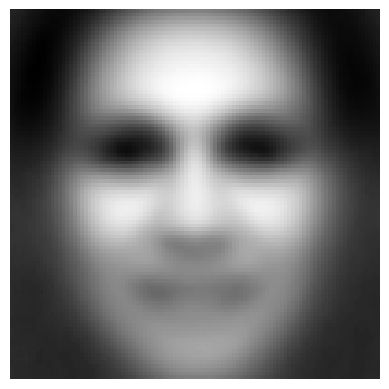

In [8]:
# visualize mean face
plt.imshow(mean_face.reshape((100,100)),cmap='gray')
plt.axis('off')
plt.show()

**Subtract data with mean face**

In [9]:
X_t = X - mean_face # transformed data

**Apply X_t data to PCA**

- Find the right number of component - Elbow
- With right number compnent computer Principal components

In [10]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
pca.fit(X_t)

PCA(whiten=True)

In [11]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1,len(exp_var_df)+1)

exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.251884,0.251884,1
1,0.114185,0.366069,2
2,0.105331,0.471400,3
3,0.051824,0.523224,4
4,0.033257,0.556481,5


In [12]:
exp_var_df.set_index('principal_components',inplace=True)

<Axes: xlabel='principal_components'>

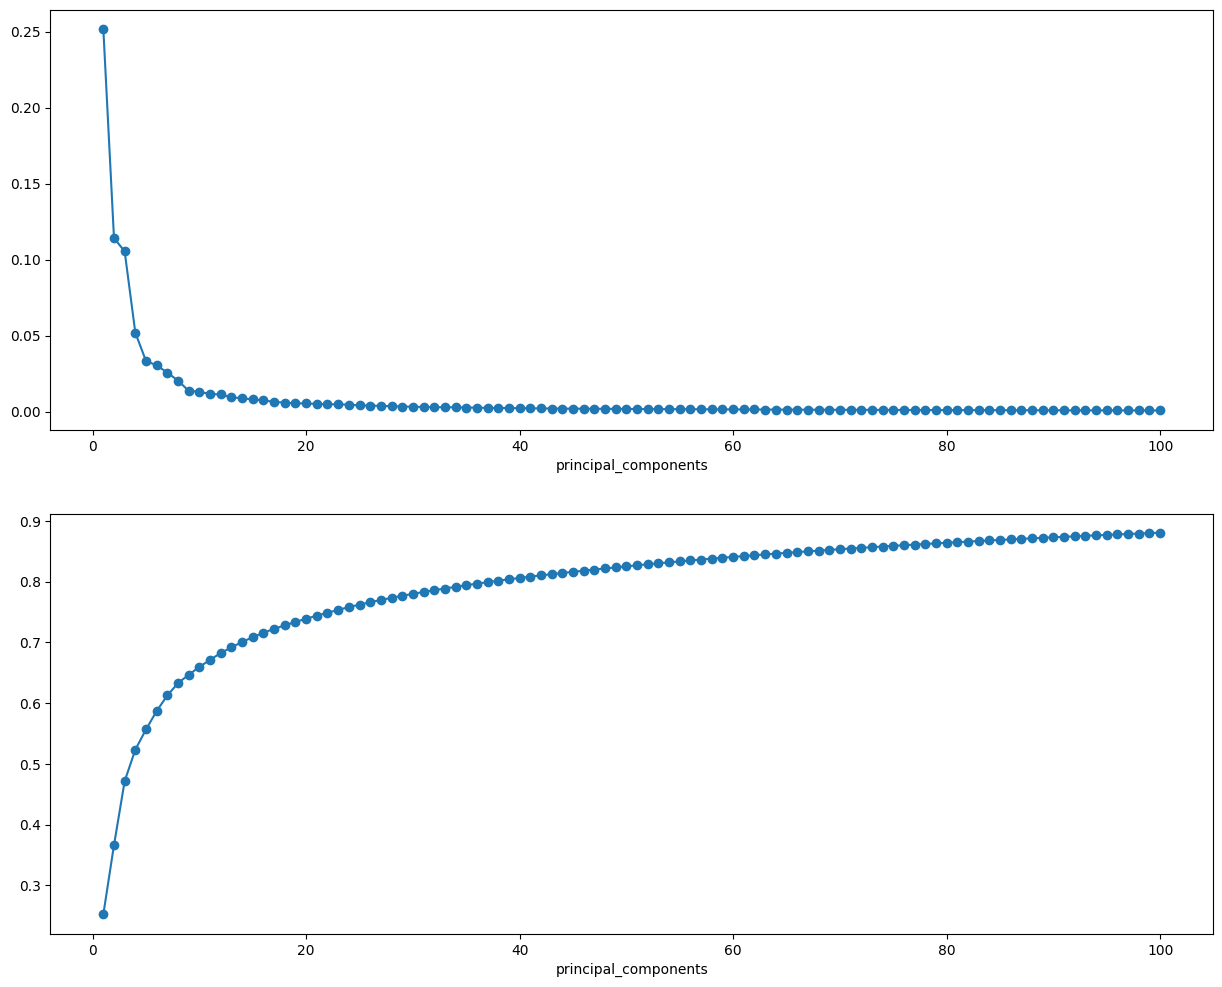

In [13]:
# visualize explained variance
fig, ax = plt.subplots(nrows=2,figsize=(15,12))

exp_var_df['explained_var'].head(100).plot(kind='line',marker='o',ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line',marker='o',ax=ax[1])

From above plot, it is clear that with approximately **50 pricipal components having 80%** converage.

In [14]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
pca_data = pca_50.fit_transform(X_t)

In [15]:
pca_data.shape

(4323, 50)

In [16]:
# saving data and models
y = data['gender'].values # independent variables convert to numpy array
np.savez('./data/data_pca_50_target',pca_data,y)

In [19]:
# saving the model
pca_dict = {'pca':pca_50,'mean_face':mean_face}

In [20]:
pickle.dump(pca_dict,open('model/pca_dict.pickle','wb'))

### Visualize Eigen Image

In [21]:
pca_data_inv = pca_50.inverse_transform(pca_data)

In [22]:
pca_data_inv.shape

(4323, 10000)

In [23]:
eig_img = pca_data_inv[0,:].reshape((100,100))
eig_img.shape

(100, 100)

(-0.5, 99.5, 99.5, -0.5)

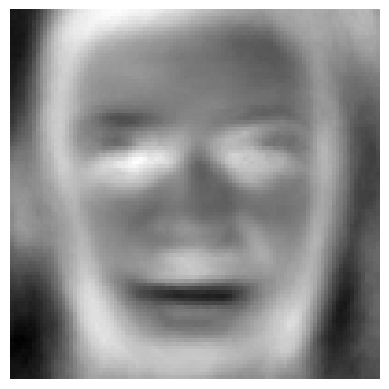

In [24]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')

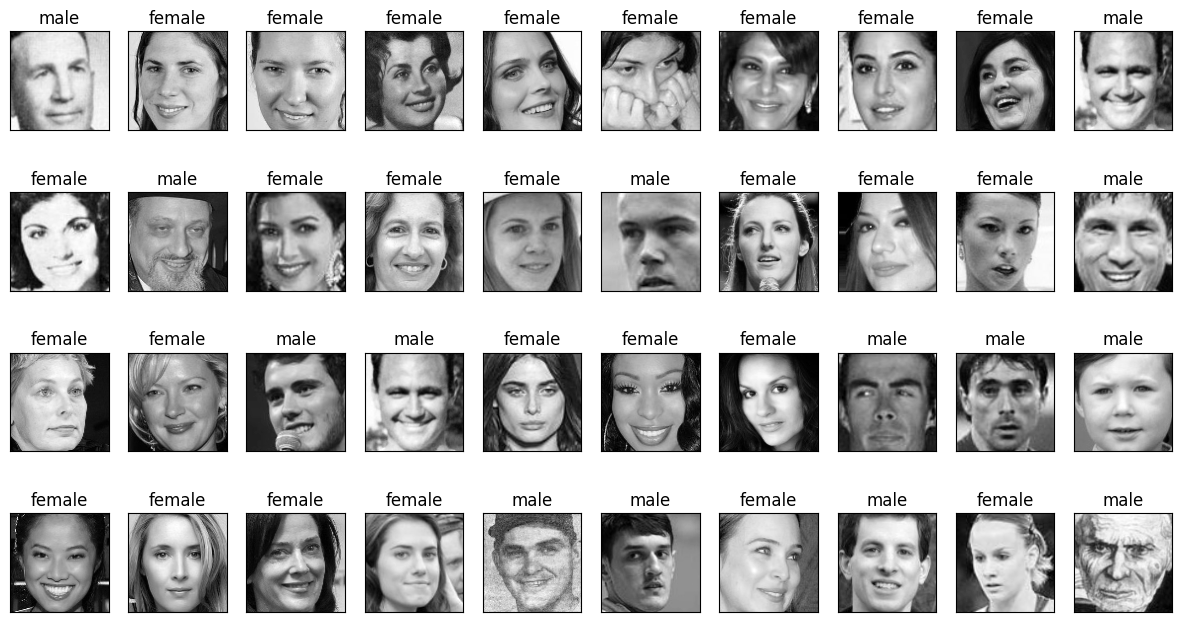

====================Eigen Images====================


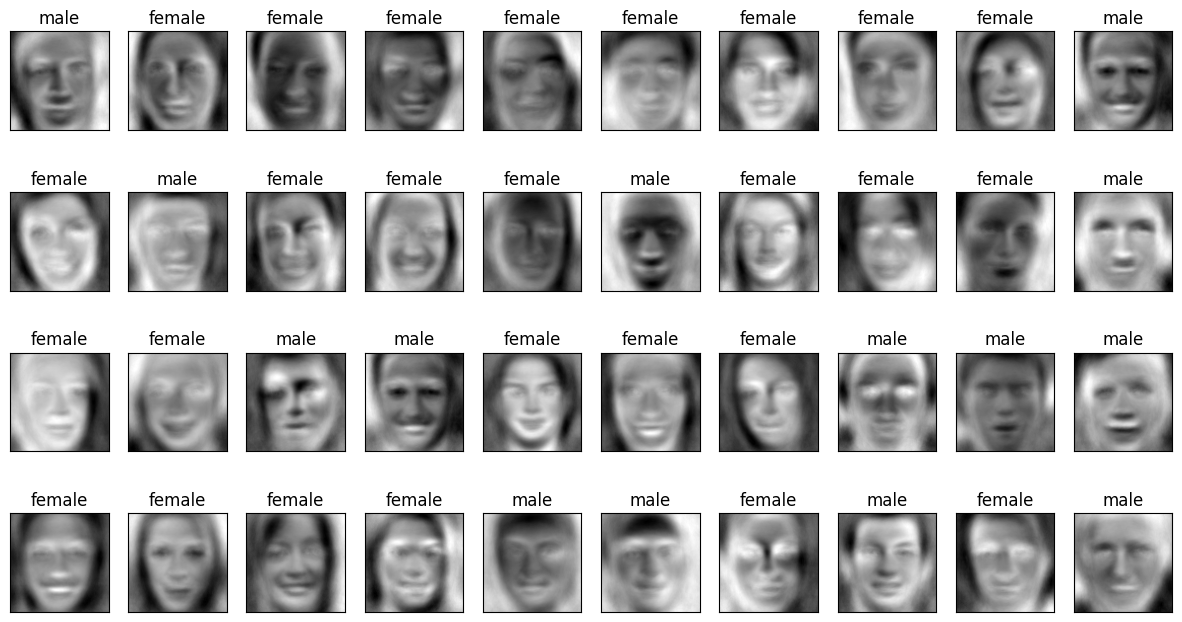

In [25]:
np.random.seed(1001)
pics = np.random.randint(0,4323,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()